<a href="https://colab.research.google.com/github/ShoSato-047/STAT380/blob/main/STAT380_4_2_(2025)_simple_binary_response_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook we formally consider GLMs for modeling a binary response $Y_i$ given covariate $X_i$.  There are two such models:

* Logistic regression (most common): models the *log-odds* of $Y_i = 1$ given $X_i$.
* Rate ratio regression (less common): models the *log probability* of $Y_i = 1$ given $X_i$.

In this notebook we focus on fitting the model and interpreting coefficients.

# Case study

We'll once again consider the lobster survival data from the previous notebook:

In [1]:
library(dplyr)
lobsters <- read.csv('https://www.dropbox.com/s/kw3px03a6t3s1x3/lobsters.csv?dl=1')
head(lobsters)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,length.mm,size,survival
,<int>,<chr>,<int>
1,27,small,0
2,27,small,0
3,27,small,0
4,27,small,0
5,27,small,0
6,30,small,0


# The logistic model

For binary response $Y\sim BIN(1,p)$ with a single covariate $X$, the logistic regression model links $p_{X} = E(Y | X) = P(Y=1|X)$ to the linear term $\beta_0 + \beta_1 X$ by way of the logit, or log-odds, function:


$$logit(E(Y|X)) = \log\left(\frac{p_{X}}{1-p_{X}}\right) = \beta_0 + \beta_1 X.$$

## Coefficient interpretation

We interpret the coefficients of the logistic model similarly to coefficients from an ordinary linear regression model, but now in terms of the *log-odds*.

* $\beta_0$ represents the log-odds of $Y = 1$ when $X = 0$
* $\beta_1$ represents the change in the log-odds for a one-unit change in $X$

Note that a difference in log-odds is just:

$$\beta_1 = \log\left(\frac{p_{X+1}}{1-p_{X+1}}\right) - \log\left(\frac{p_{X}}{1-p_{X}}\right)$$
$$=\log\left(\frac{p_{X+1}}{1-p_{X+1}}/\frac{p_{X}}{1-p_{X}}\right)$$

i.e., $\beta_1$ represents the *log odds ratio* for a one-unit change in $X$.



## Exponentiated coefficients

We have:

$$\beta_0 = \log\left(\frac{p_0}{1-p_0}\right),$$

the log-odds of $Y=1$ when $X=0$.  It follows that:

$$e^{\beta_0} = \frac{p_0}{1-p_0}$$

represents the *odds of $Y=1$ when $X=0$.*

For any given $X$:

$$e^{\beta_0 +\beta_1 X} = \frac{p_X}{1-p_X}$$

represents the *odds of $Y=1$ given $X$.*

Since $\beta_1$ represents the *log odds ratio* for a one-unit change in $X_i$, we can back-transform to note that:

$$e^{\beta_1} = \frac{p_{X+1}}{1-p_{X+1}}/\frac{p_{X}}{1-p_{X}},$$

i.e., that $\beta_1$ represents the *odds ratio* for a one-unit change in $X$.

## From log-odds to probability

When we fit a logistic regression model we model:

$$logit(p_X) =\log\left(\frac{p_{X}}{1-p_{X}}\right) = \beta_0 + \beta_1 X$$

Plugging in $X$ to the linear term will yield *linear fitted values*.  We can obtain fitted values on the scale of $p_X = E(Y|X)$ by way of inverting the logit function, which is often referred to as the **expit** function:

$$p_X = expit(\beta_0 + \beta_1 X) =  \frac{\exp(\beta_0 + \beta_1 X)}{1+\exp(\beta_0 + \beta_1 X)}$$

These are called *response fitted values.*

# Fitting the simple logistic model: lobster size

Let's consider a simple logistic model of $P(Y_i = 1 | X_i)$ for the lobster data, where $Y_i = 1$ if lobster $i$ survived the tank experience and 0 otherwise.  For now we will model $Y_i$ using the binary $X_i$ where:

$$\begin{cases} X_i = 1 & \mbox{small lobsters}\\
X_i = 0 & \mbox{large lobsters} \\
\end{cases}
$$

Fitting generalized linear models like logistic regression is accomplished by way of the `glm()` function.   

In [2]:
head(lobsters)

,length.mm,size,survival
,<int>,<chr>,<int>
1,27,small,0
2,27,small,0
3,27,small,0
4,27,small,0
5,27,small,0
6,30,small,0


In [3]:
survival.logistic.fit <- glm(survival ~ size, data = lobsters, family = binomial)

Note the `family=binomial` argument, which indicates we have a binomial response variable $Y_i$.  The default link function for the binomial family is the logit link, which will fit logistic regression.  Notice:

In [4]:
survival.logistic.fit$family


Family: binomial 
Link function: logit 




Investigating model output:

In [5]:
summary(survival.logistic.fit)


Call:
glm(formula = survival ~ size, family = binomial, data = lobsters)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.8899     0.2477   3.593 0.000327 ***
sizesmall    -1.7974     0.3498  -5.138 2.77e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 220.41  on 158  degrees of freedom
Residual deviance: 191.28  on 157  degrees of freedom
AIC: 195.28

Number of Fisher Scoring iterations: 4


The coefficients $\hat\beta_0$ and $\hat\beta_1$ are maximum likelihood estimators, and note this model has an AIC = 195.28 which we could use to compare to more complex models (more later).


## Understanding the coefficients

Let's focus now on interpreting those model coefficients.

Recall the 2x2 table:

In [6]:
xtabs(~survival + size, data = lobsters)

        size
survival large small
       0    23    57
       1    56    23

Previously we found the following summaries (remember $X=0$ for large and $X=1$ for small lobsters):

* $Odds(Y=1|X = 0) = 56/23$
* $Odds(Y=1|X = 1) = 23/57$
* $Odds\ ratio(X=1/X=0) = (23\cdot 23) / (56\cdot 57) = 0.166$

Using these summaries:

* Verify $\hat\beta_0 = 0.8899$.
* Verify $\hat\beta_0 + \hat\beta_1 = 0.8899-1.7974 = -0.9075$.
* Verify $\exp(\hat\beta_1)$.

In [7]:
# verify estimated intercept:
# log-odds of survival for x = 0 (large lobsters)
log(56/23)

[1] 0.8898575

In [8]:
# intercept + slope:
log(23/57)

[1] -0.9075571

In [9]:
# slope
# difference in log-odds, X=1 minus X=0 (small -large):
log(23/57) - log(56/23)

[1] -1.797415

## Understanding the fitted values

Consider two types of fitted values, which we will add on to the data set:

In [13]:
# "predict" gives you predicted values
lobsters$fitted.logits <- predict(survival.logistic.fit)

In [11]:
lobsters$fitted.p <- predict(survival.logistic.fit, type = 'response')

In [12]:
head(lobsters,2)

,length.mm,size,survival,fitted.logits,fitted.p
,<int>,<chr>,<int>,<dbl>,<dbl>
1,27,small,0,-0.9075571,0.2875
2,27,small,0,-0.9075571,0.2875


In [14]:
tail(lobsters, 2)

,length.mm,size,survival,fitted.logits,fitted.p
,<int>,<chr>,<int>,<dbl>,<dbl>
158,54,large,1,0.8898575,0.7088608
159,57,large,1,0.8898575,0.7088608


* Verify computation of the first `fitted.p` value using:
  - The first `fitted.logit`
  - The 2x2 table summarizing the $Y/X$ relationship
  

In [17]:
# verify the first fitted logit:
# betahat0 + betahat1*x
0.8899 + -1.7974 *1

[1] -0.9075

In [18]:
# verify the first fitted p:
# expit(-0.9075)
exp(-0.9075)/(1+exp(-0.9075))

# Note that this is sample % of small lobsters that survived

[1] 0.2875117

In [23]:
# verify from the 2x2 table
23/80

[1] 0.2875



* Verify computation of the last `fitted.p` value using:
  - The last `fitted.logit`
  - The 2x2 table summarizing the $Y/X$ relationship

In [20]:
# verify the first fitted logit:
# betahat0 + betahat1*x
0.8899 + -1.7974 *0

[1] 0.8899

In [25]:
# verify the first fitted p:
# expit(0.8899)
exp(0.8899)/(1+exp(0.8899))

# Note that this is sample % of large lobsters that survived

[1] 0.7088695

In [24]:
# verify from the 2x2 table
56/79

[1] 0.7088608

## Testing for significance

Testing whether $Y$ (survival) is significantly associated with $X$ (size) is accomplished by testing:

$$H_0: \beta_1 = 0$$
$$H_a: \beta_1 \ne 0$$

This is often rewritten in terms of the *odds ratio*.  Since $e^0 = 1$ this becomes:

$$H_0: OR= \exp(\beta_1)  = 1$$
$$H_a: OR=\exp(\beta_1) \ne  1$$

We can test these hypotheses by forming the test statistic:

$$z = \frac{\hat\beta_1 - 0}{SE(\hat\beta_1)}$$

We compare this to a standard normal to determine statistical significance.  

Recall the model output:

In [26]:
summary(survival.logistic.fit)


Call:
glm(formula = survival ~ size, family = binomial, data = lobsters)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.8899     0.2477   3.593 0.000327 ***
sizesmall    -1.7974     0.3498  -5.138 2.77e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 220.41  on 158  degrees of freedom
Residual deviance: 191.28  on 157  degrees of freedom
AIC: 195.28

Number of Fisher Scoring iterations: 4


* Verify the `z value` for $\hat\beta_1$
* Verify the p-value
  - Using [StatKey](https://www.lock5stat.com/StatKey/)
  - Using `pnorm()`

We can also obtain confidence intervals using the `confint()` function:

In [27]:
# verify z:
-1.7974 / 0.3498

[1] -5.138365

In [29]:
pnorm(-5.1383)*2

[1] 2.77235e-07

In [ ]:
#95% CI, on the log-odds/logit scale:
confint(survival.logistic.fit)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.4184375,1.394299
sizesmall,-2.5013585,-1.126615


We typically want these to be on the odds ratio scale, which we accomplish by exponentiating:

In [ ]:
#95% CI, on the odds/odds ratio scale:
exp(confint(survival.logistic.fit))

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),1.51958530,4.0321477
sizesmall,0.08197356,0.3241285


## **Full conclusion**

Writing a summary of an association from a logistic model should involve:

* An interpretation of the *odds ratio*
* A p-value and 95% CI, on the *odds ratio* scale

Here's the interpretation from our simple logistic model:

***The odds of survival for small lobsters were 16.6% as high as the odds of survival for large lobsters, a statistically significant difference (p-value < .001; 95% CI for OR: 0.08, 0.32 does not overlap ONE).***

Of course, coding $X=1$ for small lobsters is arbitrary. If you want you could put everything on the "larger-than-one" scale by taking $1/\exp(\hat\beta_1)$ and $(1/\exp(UCL),1/\exp(LCL))$ to find the 95% confidence interval:

In [30]:
#Odds ratio, taking Odds(Large)/Odds(small):
1/exp(survival.logistic.fit$coefficients[2])

sizesmall 
 6.034026

In [31]:
#95% CI for ddds ratio, taking Odds(Large)/Odds(small):
1/exp(confint(survival.logistic.fit)[2,])

Waiting for profiling to be done...



2.5 %    97.5 % 
12.199055  3.085196

Interpretation this way:


***The odds of survival for large lobsters were 6.0 times higher than the odds of survival for small lobsters, a statistically significant difference (p-value < .001; 95% CI for OR: 3.1, 12.2 does not overlap ONE).***



# The rate ratio model

While the logistic model uses the canonical logit function to link $p_X = E(Y|X)$ with $\beta_0 + \beta_1 X$, and is the most common choice for modeling a binary response, it's not the only option.  We could also use the log link, in which case we model:


$$\log(E(Y|X)) = \log(p_X) = \beta_0 + \beta_1 X.$$

## Coefficient interpretation


* $\beta_0$ represents the log probability that $Y = 1$ when $X = 0$
* $\beta_1$ represents the change in the log probability of $Y=1$ for a one-unit change in $X$


# Fitting the simple rate ratio model: lobster size

Fitting this model requires specifying a different link function in the `glm()` call:

In [32]:
survival.log.fit <- glm(survival ~ size, data = lobsters, family = binomial(link='log'))

In [33]:
survival.log.fit$family


Family: binomial 
Link function: log 


Investigating model output:

In [34]:
summary(survival.log.fit)


Call:
glm(formula = survival ~ size, family = binomial(link = "log"), 
    data = lobsters)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.3441     0.0721  -4.772 1.82e-06 ***
sizesmall    -0.9024     0.1902  -4.745 2.09e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 220.41  on 158  degrees of freedom
Residual deviance: 191.28  on 157  degrees of freedom
AIC: 195.28

Number of Fisher Scoring iterations: 6


## Understanding the coefficients

Recall the 2x2 table:

In [35]:
xtabs(~survival + size, data = lobsters)

        size
survival large small
       0    23    57
       1    56    23

In [36]:
prop.table(xtabs(~survival + size, data = lobsters), 2)

        size
survival     large     small
       0 0.2911392 0.7125000
       1 0.7088608 0.2875000

Previously we found the following summaries (remember $X=0$ for large and $X=1$ for small lobsters):

* $P(Y=1|X = 0) = 56/79 = 0.709$
* $P(Y=1|X = 1) = 23/80 = 0.288$
* $Rate\ ratio(X=1/X=0) = 0.287/0.709 =0.4047$

Using these summaries:

* Verify $\hat\beta_0 = -0.3441$.
* Verify $\hat\beta_0 + \hat\beta_1 = -0.3441-0.9024 = -1.2465$.
* Verify $\exp(\hat\beta_1)$.

In [38]:
# verify estimated intercept:
# log of survival probability for large lobsters:
log(56/79)

[1] -0.3440962

In [40]:
# verify intercept + slope:
# log of survival probability for small lobsters:
log(23/80)

[1] -1.246532

In [41]:
# exp(betahat) = rate ratio
exp(-0.9024)
(23/80)/(56/79)

[1] 0.4055951

[1] 0.4055804

## Testing for significance


Just as in logistic regression, rate ratio regression tests for association between $X$ and $Y$ by testing whether $e^{\beta_1} = 1$, but now $e^{\beta_1}$ represents the rate ratio:

$$H_0: RR= \exp(\beta_1)  = 1$$
$$H_a: RR=\exp(\beta_1) \ne  1$$

Obtaining confidence intervals for the rate ratio:

In [ ]:
exp(confint(survival.log.fit))

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.6030994,0.8012691
sizesmall,0.2707825,0.5747536


## **Full conclusion**

The interpretations are now about ratios of probabilities.  In our case:


***The probability of survival for small lobsters were $\exp(-0.9024)$ = 41% as high as the probability of survival for large lobsters, a statistically significant difference (p-value < .001; 95% CI for RR: 0.27, 0.57 does not overlap ONE).***

If we wanted we could also reciprocate all these to obtain interpretations of the RR that are > 1.

# Logistic vs rate ratio

In practice, logistic regression (logit link) is more common than rate ratio (log link) for modeling binary outcomes for 2 reasons:

* Case control studies: in these studies, $Y=1$ are oversampled relative to $Y=0$ (e.g., to study relationships of some rare disease with risk factors).  In these studies, odds ratios are interpretable while rate ratios are biased.  Thus logistic regression is the only option.
* $-\infty < logit(p_X) < \infty$ while $0 < \log(p_X) < \infty$.  This has the advantage of $p_X$ being defined for *any $X$* in a logistic model while, in some cases, $p_X$ may not be defined if $\beta_0 + \beta_1 X$ yields something negative in a rate ratio model.

# Why the funky logit link?

The $logit(p_X) = \log\left(\frac{p_X}{1-p_X}\right)$ link is strange at first glance.  Beyond just being the link we use because it's canonical for mathematical reasons, it's also very practical.  Here's an example.

Consider modeling lobster survival not with the binary large/small variable, but the actual length in milimeters.  


Consider a naive approach, fitting an ordinary linear regression model of $Y$ vs length in millimeters:

`geom_smooth()` using formula = 'y ~ x'


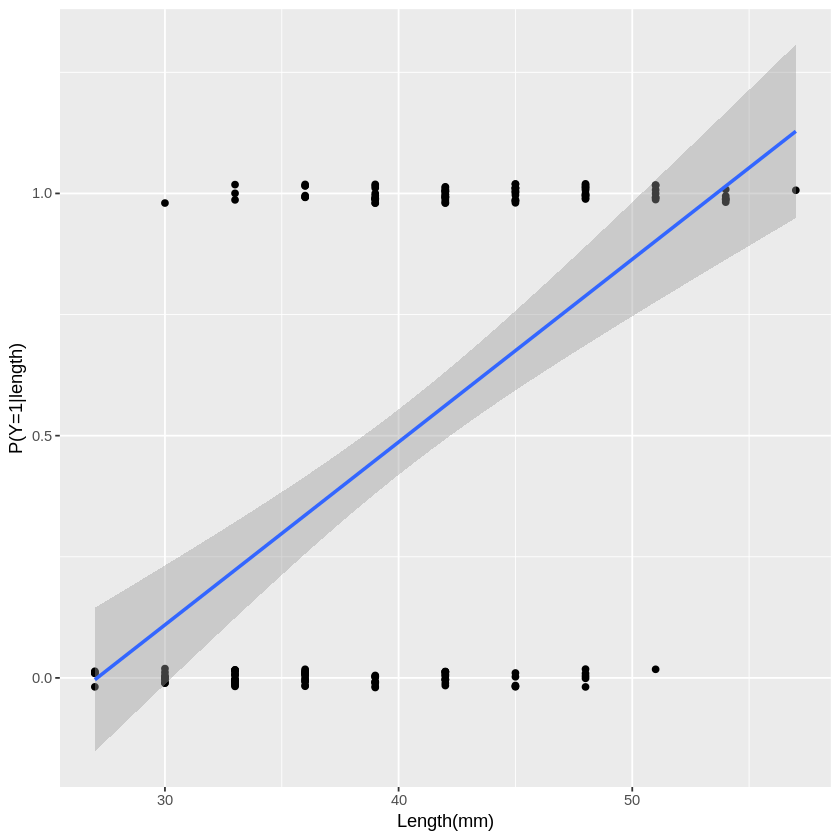

In [ ]:
library(ggplot2)
ggplot(data = lobsters, aes(x = length.mm, y = jitter(survival,.1))) +
  geom_point() +
  geom_smooth(method='lm') +
  ylab('P(Y=1|length)') + xlab('Length(mm)')

Suppose we fit the ordinary simple linear regression model:

$$p_{X_i} = E(Y_i|X_i) = \beta_0 + \beta_1 X_i$$

Where now, $X_i$ is the length in mm of lobster $i$.

In [42]:
ols.length.fit <- lm(survival~length.mm, data = lobsters)
summary(ols.length.fit)


Call:
lm(formula = survival ~ length.mm, data = lobsters)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90152 -0.33413 -0.01499  0.38217  0.89282 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.027588   0.205645  -4.997 1.54e-06 ***
length.mm    0.037826   0.005031   7.518 4.00e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4315 on 157 degrees of freedom
Multiple R-squared:  0.2647,	Adjusted R-squared:   0.26 
F-statistic: 56.52 on 1 and 157 DF,  p-value: 4.002e-12


* Consider a 26-mm lobster.  What is $\hat p_{26}$, the modeled probability of survival for a 26-mm lobster?
* Consider a 54-mm lobster (of which there are several in the data set).  What is $\hat p_{54}$, the modeled probability of survival for a 54-mm lobster?
* What are the issues with these fitted values?

In [56]:
# find fitted value for 26 mm lobster:
-1.027588 + 0.037826*26

# probabiity is negative

[1] -0.044112

In [57]:
# find fitted value for 54 mm lobster:
-1.027588 + 0.037826*54

# probability is more than 100%

[1] 1.015016

Now consider a logistic fit of the form:

$$\log\left(\frac{p_{X_i}}{1-p_{X_i}}\right) = \beta_0 + \beta_1 X_i$$

where once again $X_i$ is the length in mm of lobster $i$.

In [58]:
logistic.length.fit  <- glm(survival~length.mm, data = lobsters, family=binomial)
summary(logistic.length.fit)


Call:
glm(formula = survival ~ length.mm, family = binomial, data = lobsters)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.89597    1.38501  -5.701 1.19e-08 ***
length.mm    0.19586    0.03415   5.735 9.77e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 220.41  on 158  degrees of freedom
Residual deviance: 172.87  on 157  degrees of freedom
AIC: 176.87

Number of Fisher Scoring iterations: 4


* Consider a 26-mm lobster.  What is $\hat p_{26}$, the modeled probability of survival for a 26-mm lobster?
* Consider a 54-mm lobster (there actually is one in this data set).  What is $\hat p_{54}$, the modeled probability of survival for a 54-mm lobster?
* Why are these preferable to the OLS fitted values?

In [59]:
# logistic model gives probability that can be interpreted.
# linear in log-odds scale
# s shape in p scale

In [60]:
# fitted log-odds for the 26mm lobster:
-7.89597 + 0.19586*26

[1] -2.80361

In [61]:
# fitted probability for the 26mm lobster:
# expit
exp(-2.80361) / (1+exp(-2.80361))

[1] 0.05712941

In [62]:
# fitted log-odds for the 54mm lobster:
-7.89597 + 0.19586*54

[1] 2.68047

In [63]:
# fitted probability for the 54mm lobster:
# expit
exp(2.68047) / (1+exp(2.68047))

[1] 0.9358643

Adding the fitted probabilities from this logistic model to the data set, and plotting them:

In [64]:
lobsters$length.fitted.p <- predict(logistic.length.fit, type = 'response')

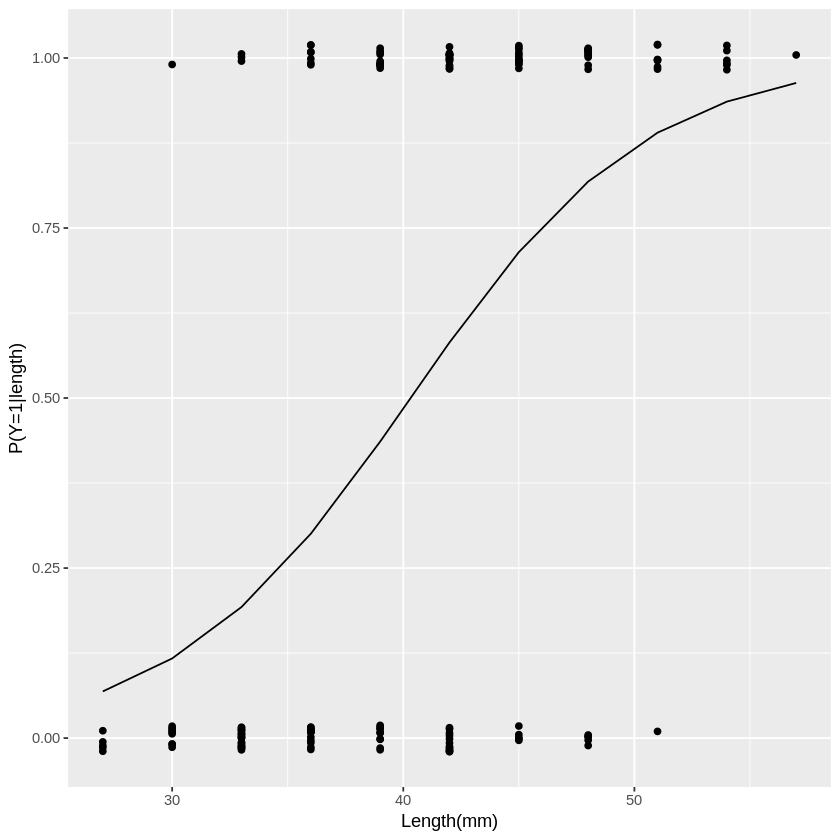

In [65]:
library(ggplot2)
ggplot(data = lobsters, aes(x = length.mm, y = jitter(survival, .1))) +
  geom_point() +
  geom_line(aes(x = length.mm, y = length.fitted.p)) +
  ylab('P(Y=1|length)') + xlab('Length(mm)')

The graphs below show the relationship between $p$ and $logit(p)$:

![](https://i.stack.imgur.com/WY61Z.png)

The linear term $\beta_0 + \beta_1 X$ can be anywhere on the real line.  This is problematic if you are modeling $p$ directly and plugging in some $X$ yields fitted values outside of $[0,1]$.  However, this is no problem with the logit link, when $logit(p) = \beta_0 + \beta_1 X$:  since $p = \frac{\exp(\beta_0 + \beta_1 X)}{1+\exp(\beta_0 + \beta_1 X)}$, the linear term $\beta_0 + \beta_1 X$ can be anywhere on the real line but $p$ is still guaranteed to be $\in [0,1]$.

# Regression on quantitative covariate

Reconsider the following logistic model:


$$\log\left(\frac{p_{X_i}}{1-p_{X_i}}\right) = \beta_0 + \beta_1 X_i$$

where once again $X_i$ is the length in mm of lobster $i$.

In [66]:
logistic.length.fit  <- glm(survival~length.mm, data = lobsters, family=binomial)
summary(logistic.length.fit)


Call:
glm(formula = survival ~ length.mm, family = binomial, data = lobsters)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.89597    1.38501  -5.701 1.19e-08 ***
length.mm    0.19586    0.03415   5.735 9.77e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 220.41  on 158  degrees of freedom
Residual deviance: 172.87  on 157  degrees of freedom
AIC: 176.87

Number of Fisher Scoring iterations: 4


In [67]:
confint(logistic.length.fit)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-10.8034922,-5.3449643
length.mm,0.1329987,0.2675871


This is regression on a *quantitative* covariate, length.  

* $\hat\beta_0$: the log-odds of survival for a 0-mm lobster
  - Clearly absurd; could again mean-center the lengths to obtain a more meaningful intercept estimate.

Exponentiating the $\hat\beta_1$ coefficient and 95% CI:

In [72]:
exp(3*logistic.length.fit$coefficients[2])

length.mm 
 1.799617

In [73]:
exp(confint(logistic.length.fit))

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),2.032839e-05,0.004772121
length.mm,1.142249e+00,1.306807434


Interpretation:

***The odds of survival are 1.2 times greater for every 1-mm increase in lobster length, a statisticailly significant increase (p-value <.001; 95% CI: 1.1, 1.3)***

Question:

* This interpretation is for every 1-mm increase in lobster length, but the length brackets are 3mm.  What is the modeled odds ratio comparing lobsters that differ by 3mm in length?

We can determine whether this is statistically significant, once again, by way of `emmeans`:

In [74]:
install.packages('emmeans')
library(emmeans)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Setting up an `emmeans` object, picking two lengths 3 mm apart (ultimately we will contrast these, and the actual lengths do not matter as long as they are 3 mm apart):

In [75]:
emobject.logit <- emmeans(logistic.length.fit, specs = ~length.mm, at  =list(length.mm=c(30, 33)))
emobject.logit

 length.mm emmean    SE  df asymp.LCL asymp.UCL
        30  -2.02 0.394 Inf     -2.79     -1.25
        33  -1.43 0.308 Inf     -2.04     -0.83

Results are given on the logit (not the response) scale. 
Confidence level used: 0.95 

* Verify these estimates given the model summary output.

In [76]:
contrast(emobject.logit, method ='pairwise')

 contrast                  estimate    SE  df z.ratio p.value
 length.mm30 - length.mm33   -0.588 0.102 Inf  -5.735  <.0001

Results are given on the log odds ratio (not the response) scale. 

By default, the output is on the logit scale, and the contrast is the difference in log-odds.  We can return the output on the odds ratio scale with `type = 'response'`:

In [77]:
contrast(emobject.logit, method ='pairwise', type = 'response')

 contrast                  odds.ratio     SE  df null z.ratio p.value
 length.mm30 / length.mm33      0.556 0.0569 Inf    1  -5.735  <.0001

Tests are performed on the log odds ratio scale 

Obtaining the 95% CI:

In [78]:
confint(contrast(emobject.logit, method ='pairwise', type = 'response'))

,contrast,odds.ratio,SE,df,asymp.LCL,asymp.UCL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,length.mm30 / length.mm33,0.5556738,0.05693497,Inf,0.4545743,0.6792584


`contrast()` has a nifty little `revpairwise` method if you want the contrasts the other way:

In [79]:
contrast(emobject.logit, method ='revpairwise', type = 'response')

 contrast                  odds.ratio    SE  df null z.ratio p.value
 length.mm33 / length.mm30        1.8 0.184 Inf    1   5.735  <.0001

Tests are performed on the log odds ratio scale 

In [80]:
confint(contrast(emobject.logit, method ='revpairwise', type = 'response'))

,contrast,odds.ratio,SE,df,asymp.LCL,asymp.UCL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,length.mm33 / length.mm30,1.799617,0.1843908,Inf,1.472194,2.19986


* Verify that these contrasts are the same if we compare a 35mm lobster to a 38mm lobster.  Then write a formal summary of the contrast between lobsters that differ by 3mm.

# **Conclusion**
**A 3-mm increase in length is associated with a 1.8 times higher odss of survival, a statistically significant increase (p-value < 0.0001, 95% CI: 1.47, 2.20 does not overlap 1).**